In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
data = pd.read_csv("dataset_sdn.csv")
data = data.iloc[:10000:]

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dt           10000 non-null  int64  
 1   switch       10000 non-null  int64  
 2   src          10000 non-null  object 
 3   dst          10000 non-null  object 
 4   pktcount     10000 non-null  int64  
 5   bytecount    10000 non-null  int64  
 6   dur          10000 non-null  int64  
 7   dur_nsec     10000 non-null  int64  
 8   tot_dur      10000 non-null  float64
 9   flows        10000 non-null  int64  
 10  packetins    10000 non-null  int64  
 11  pktperflow   10000 non-null  int64  
 12  byteperflow  10000 non-null  int64  
 13  pktrate      10000 non-null  int64  
 14  Pairflow     10000 non-null  int64  
 15  Protocol     10000 non-null  object 
 16  port_no      10000 non-null  int64  
 17  tx_bytes     10000 non-null  int64  
 18  rx_bytes     10000 non-null  int64  
 19  tx_kb

In [20]:
# data= data.iloc[:60000,:]
# data

   # EDA

<Axes: title={'center': 'Class Distribution'}, xlabel='label'>

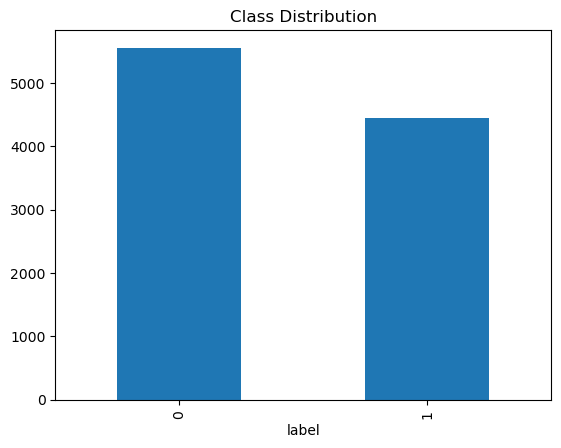

In [21]:
data.label.value_counts().plot(kind='bar', title='Class Distribution')

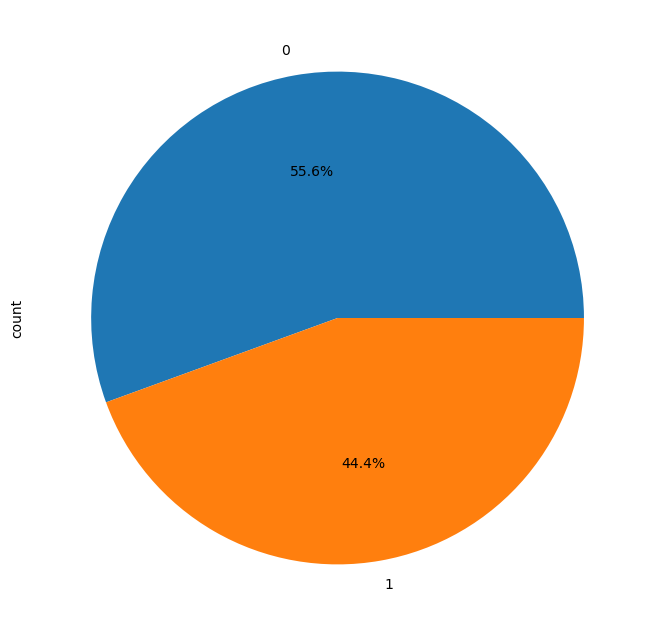

In [22]:
data["label"].value_counts().plot(kind = "pie", autopct = "%1.1f%%", figsize = 
                                         [12,8]);

In [23]:
# using a pandas function to check for numerical columns
def num_feat(data_temp):
    x = []
    for label, content in data_temp.items():
        if pd.api.types.is_numeric_dtype(content):
            x.append(label)
    return x
labels = num_feat(data)

In [24]:
labels

['dt',
 'switch',
 'pktcount',
 'bytecount',
 'dur',
 'dur_nsec',
 'tot_dur',
 'flows',
 'packetins',
 'pktperflow',
 'byteperflow',
 'pktrate',
 'Pairflow',
 'port_no',
 'tx_bytes',
 'rx_bytes',
 'tx_kbps',
 'rx_kbps',
 'tot_kbps',
 'label']

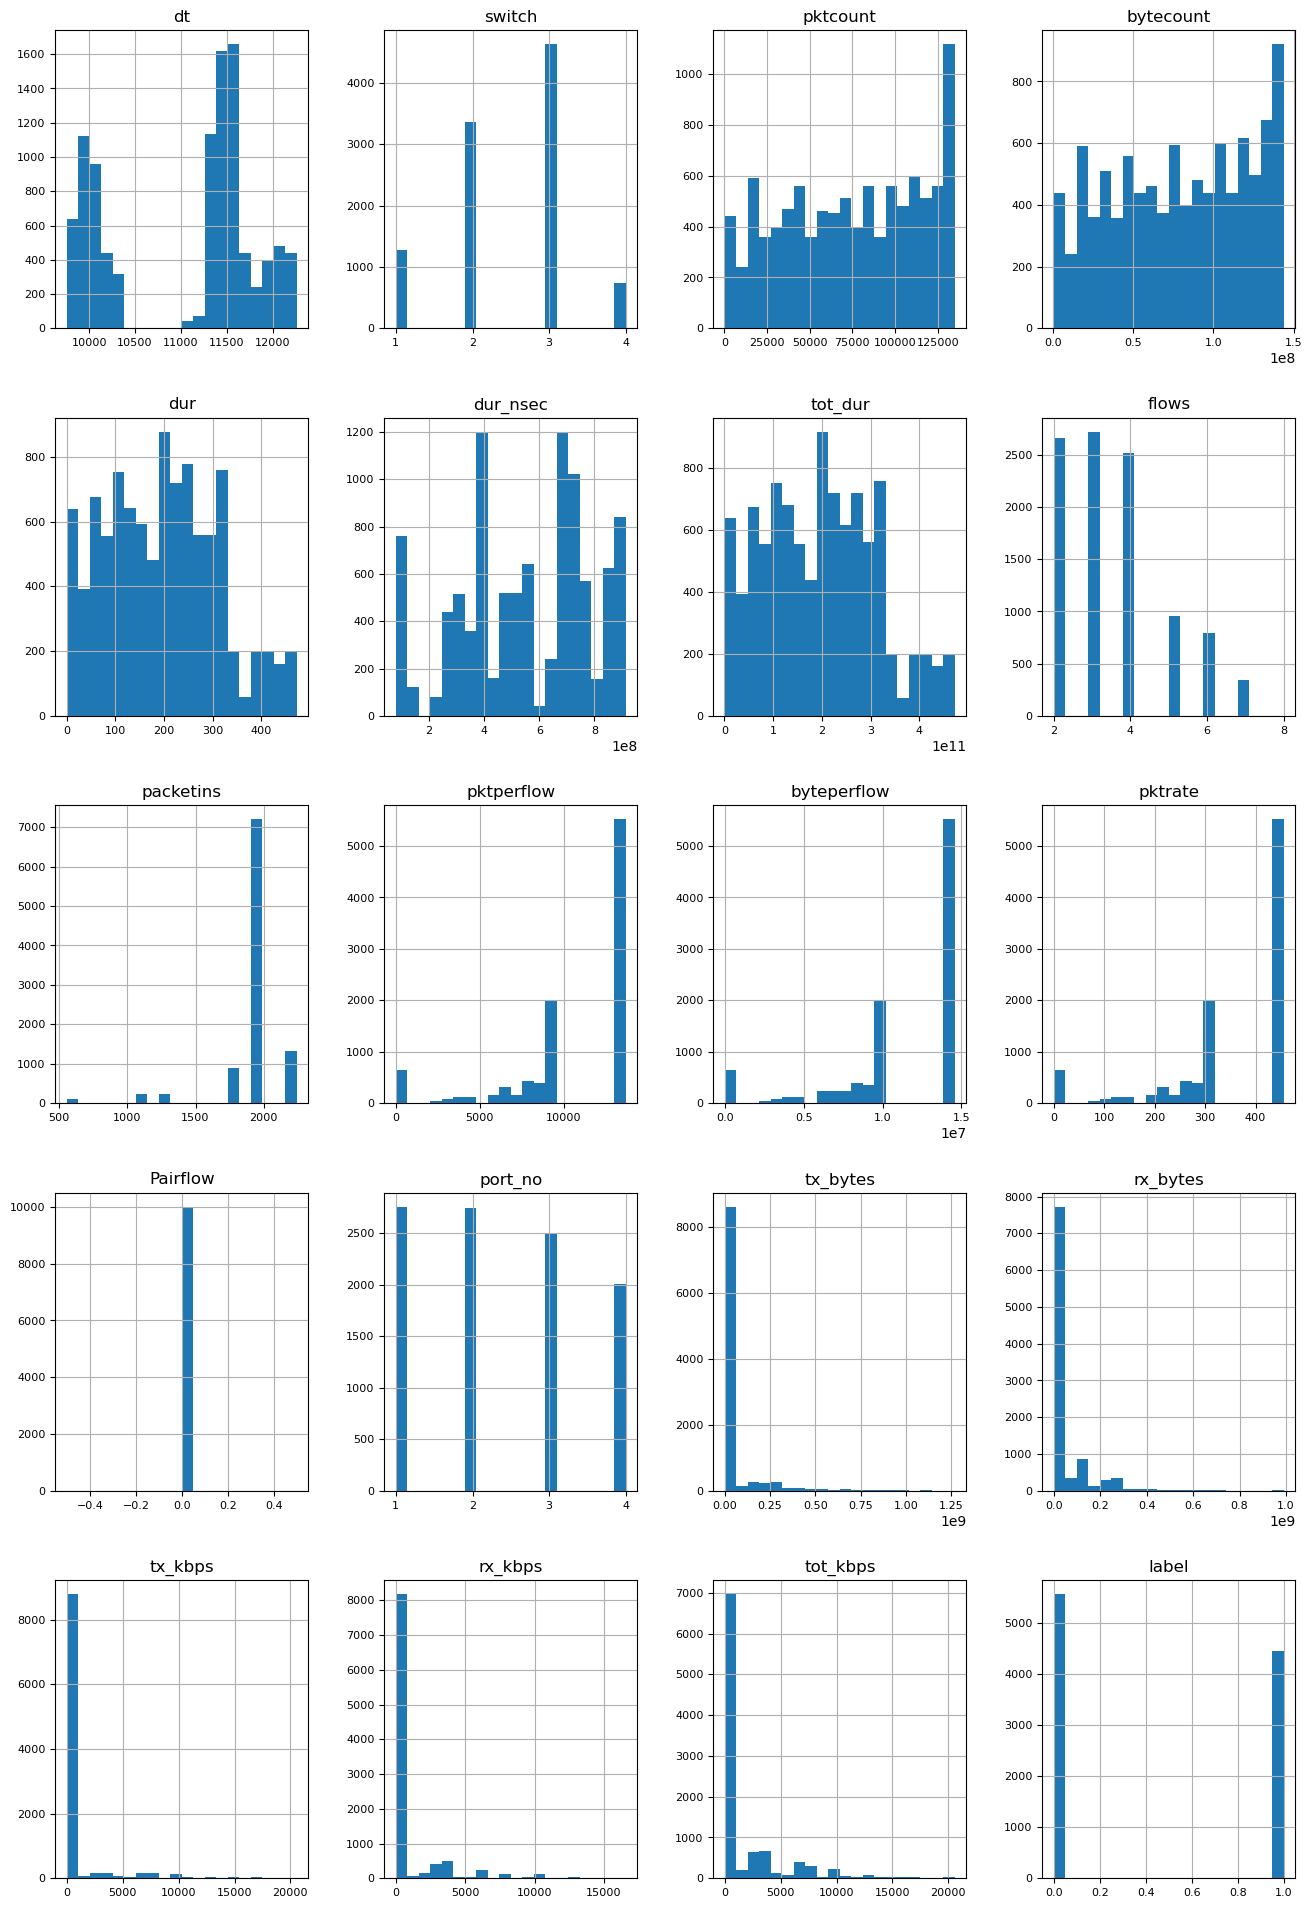

In [25]:
num_feat = data[labels]
# Figure out the distribution of numerical features in the dataset features
num_feat.hist(figsize=(16, 24), bins=20,xlabelsize=8, ylabelsize=8)

plt.show()

In [26]:
#check for categorical features
string_label =[]
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        string_label.append(label)
        print(label)

src
dst
Protocol


In [27]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoders = {}
for col in string_label:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Print the encoded DataFrame
data

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,0,1,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,0,3,143928631,3917,0,0.0,0.0,0
1,11605,1,0,1,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,0,4,3842,3520,0,0.0,0.0,0
2,11425,1,4,1,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,0,1,3795,1242,0,0.0,0.0,0
3,11425,1,4,1,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,0,2,3688,1492,0,0.0,0.0,0
4,11425,1,4,1,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,0,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,11485,4,4,1,117087,124814742,258,834000000,2.590000e+11,6,...,451,0,0,2,4139,125201146,0,3837.0,3837.0,0
9996,11485,4,4,1,117087,124814742,258,834000000,2.590000e+11,6,...,451,0,0,3,202402181,4127,7676,0.0,7676.0,0
9997,11485,4,3,1,65894,68661548,210,860000000,2.110000e+11,6,...,309,0,0,3,4295,238103395,0,10242.0,10242.0,1
9998,11485,4,4,1,117087,124814742,258,834000000,2.590000e+11,6,...,451,0,0,1,3795,1402,0,0.0,0.0,0


In [28]:
data.describe()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,...,10000.000000,10000.0,10000.0,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,11057.281600,2.481600,2.843000,0.652400,75291.19310,7.966358e+07,195.251000,5.513800e+08,1.958208e+11,3.552100,...,351.509300,0.0,0.0,2.374900,4.700992e+07,4.699641e+07,902.550200,902.792400,1805.342600,0.444400
std,790.792451,0.807791,2.864816,0.476232,40369.41437,4.279166e+07,114.374874,2.351517e+08,1.143912e+11,1.363991,...,130.882588,0.0,0.0,1.088792,1.463899e+08,1.075180e+08,2903.783451,2305.850666,3481.251459,0.496924
min,9756.000000,1.000000,0.000000,0.000000,284.00000,3.027440e+05,0.000000,7.900000e+07,8.370000e+08,2.000000,...,0.000000,0.0,0.0,1.000000,2.845000e+03,9.260000e+02,0.000000,0.000000,0.000000,0.000000
25%,10086.000000,2.000000,0.000000,0.000000,43262.00000,4.507900e+07,101.000000,3.800000e+08,1.020000e+11,2.000000,...,303.000000,0.0,0.0,1.000000,3.599000e+03,1.472000e+03,0.000000,0.000000,0.000000,0.000000
50%,11395.000000,3.000000,1.000000,1.000000,76741.00000,8.180591e+07,192.000000,5.590000e+08,1.930000e+11,3.000000,...,443.000000,0.0,0.0,2.000000,3.826000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
75%,11575.000000,3.000000,6.000000,1.000000,112761.00000,1.202032e+08,280.000000,7.360000e+08,2.810000e+11,4.000000,...,451.000000,0.0,0.0,3.000000,4.232000e+03,6.707000e+03,0.000000,0.000000,2581.000000,1.000000
max,12265.000000,4.000000,9.000000,1.000000,135036.00000,1.439484e+08,473.000000,9.140000e+08,4.730000e+11,8.000000,...,456.000000,0.0,0.0,4.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


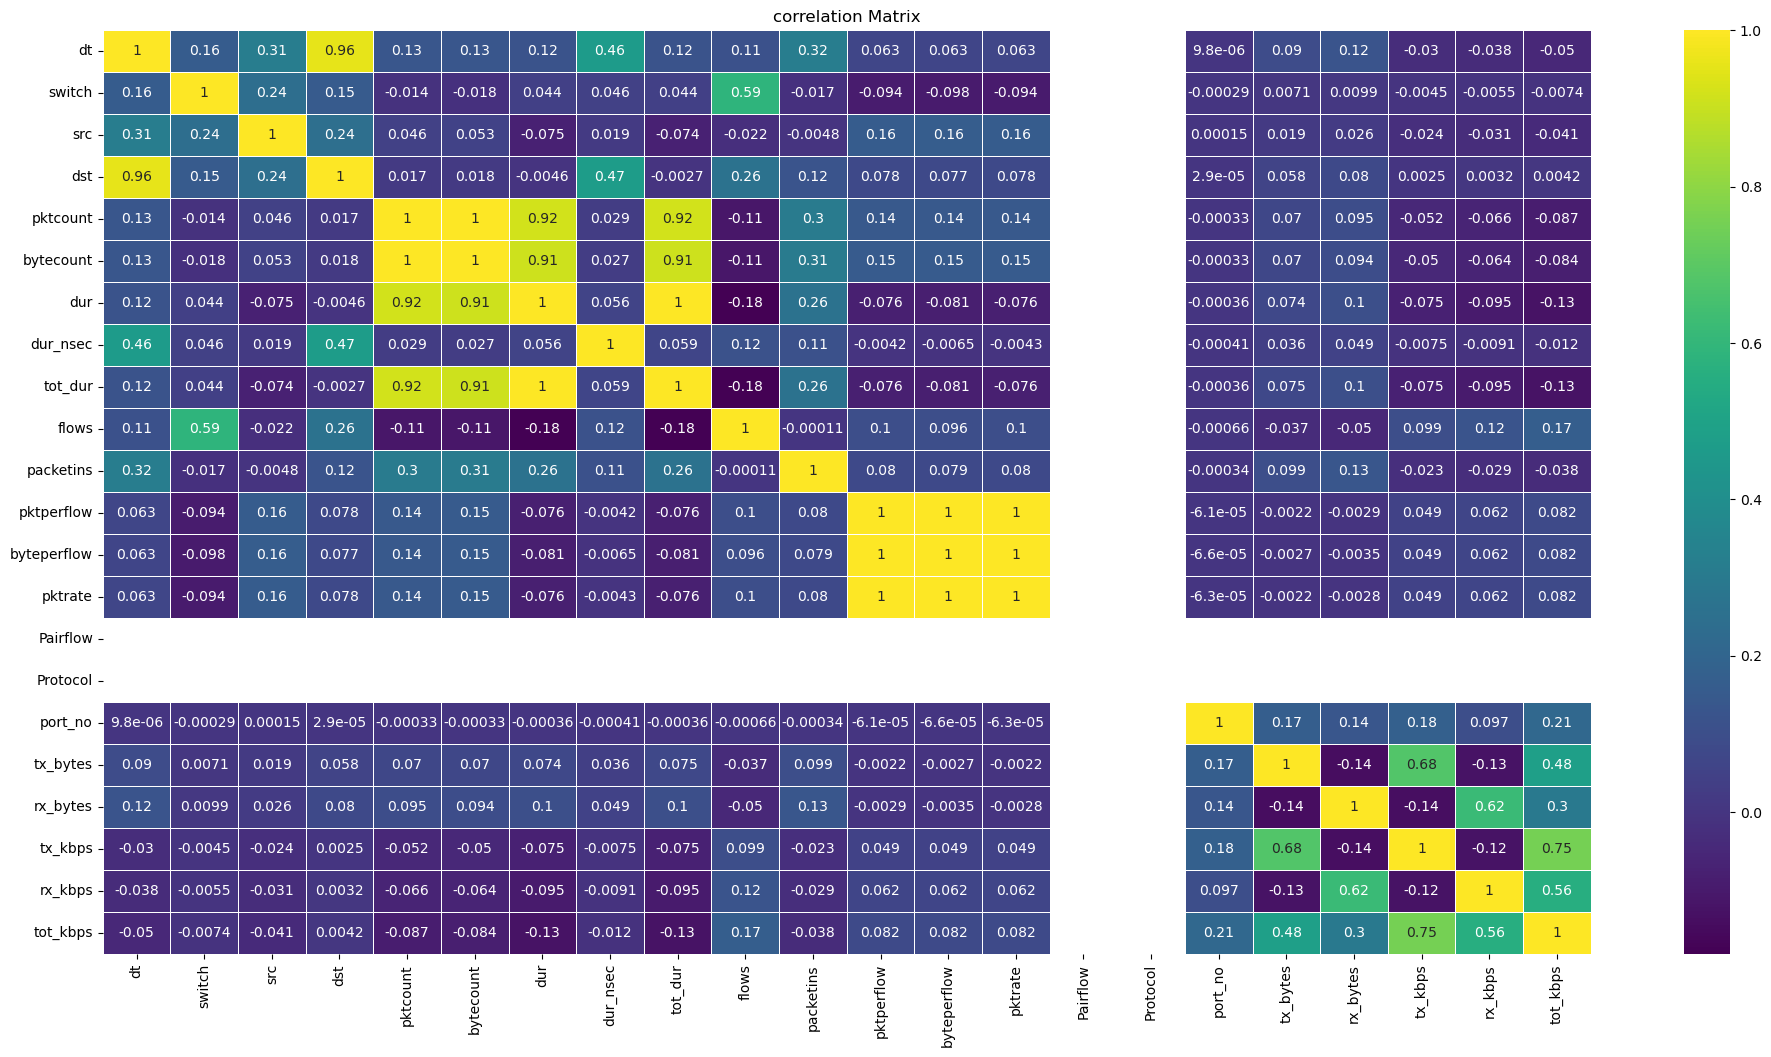

In [29]:
plt.figure(figsize=(24, 12))
sns.heatmap(data.iloc[:,:-1].corr(), annot=True, cmap='viridis', cbar=True, linewidths=0.5)
plt.title('correlation Matrix')
plt.show()

In [30]:
data.isnull().sum()

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

In [31]:
data['rx_kbps'].fillna(0, inplace = True)
data['tot_kbps'].fillna(0, inplace = True)

# Data Segementation

In [32]:
X = data.drop('label', axis = 1)
y = data.label

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# # Split the data to training, validation and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Evaluation Matrics For the ML models

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import classification_report

def evaluate_model(y_val, y_pred):
    """Function to evaluate model and return the metric of the model

    It returns a dictionary with the classification metrics.
    """
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='macro')
    recall = recall_score(y_val, y_pred, average='macro')
    f1 = f1_score(y_val, y_pred, average='macro')
    result = {"accuracy_score": accuracy,
            "precision_score": precision,
            "recall_score": recall,
            "f1_score": f1}
    return result
#Funtion to make a confusion matrix
def plot_confusion_matrix(y_test, y_pred, label):
    """
    Plots a confusion matrix for the given model using test data.

    Parameters:
    - y_test: Test labels.
    - y_pred: Predicted labels.
    - label: A dictionary mapping numerical labels to descriptive names.
    """
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create a new figure
    plt.figure(figsize=(10, 7))
    
    # Plot confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
    
    # Update x-axis labels
    plt.xticks(np.arange(0.5, len(label)), label.values(), rotation=45)
    
    # Update y-axis labels
    plt.yticks(np.arange(0.5, len(label)), label.values())
    
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title('Confusion Matrix')
    plt.show()

# Define the label mapping
label = {0: '0 - Benign', 1: '1 - Malware'}

# Rates of predictions 
def calculate_rates(y_true, y_pred):
    conf_matrix = multilabel_confusion_matrix(y_true, y_pred)

    TP = conf_matrix[1, 1]
    FP = conf_matrix[0, 1]
    TN = conf_matrix[0, 0]
    FN = conf_matrix[1, 0]

    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    FNR = FN / (TP + FN)
    TNR = TN / (FP + TN)

    return f"TPR: {TPR}, FPR: {FPR}, FNR: {FNR}, TNR: {TNR}"

#RUC 
from sklearn.metrics import roc_auc_score, roc_curve
def plot_auroc(model, X_test, y_test):
    # Get the predicted probabilities for the positive class
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Calculate the AUROC
    auroc = roc_auc_score(y_test, y_probs)
    print(f"AUROC: {auroc:.4f}")
    
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    
    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUROC = {auroc:.4f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(True)
    plt.show()

# Training the ML Model

### KNN Algorithm

In [253]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_test)


In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

#Scaling the dataset
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_test)

#fiting the model
knn_model.fit(scaled_X_train, y_train)
knn_y_pred = knn_model.predict(scaled_X_val)

print(evaluate_model(y_test, knn_y_pred))
print(classification_report(y_test, knn_y_pred))
# plot_confusion_matrix(y_test, knn_y_pred, label)

{'accuracy_score': 0.9858888888888889, 'precision_score': 0.9860822872982133, 'recall_score': 0.9854591484547431, 'f1_score': 0.9857594645738088}
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9828
           1       0.99      0.98      0.98      8172

    accuracy                           0.99     18000
   macro avg       0.99      0.99      0.99     18000
weighted avg       0.99      0.99      0.99     18000



In [38]:
calculate_rates(y_test, knn_y_pred)

'TPR: [0.01587783 0.98804241], FPR: [0.01195759 0.98412217], FNR: [0.98412217 0.01195759], TNR: [0.98804241 0.01587783]'

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


AUROC: 0.5138


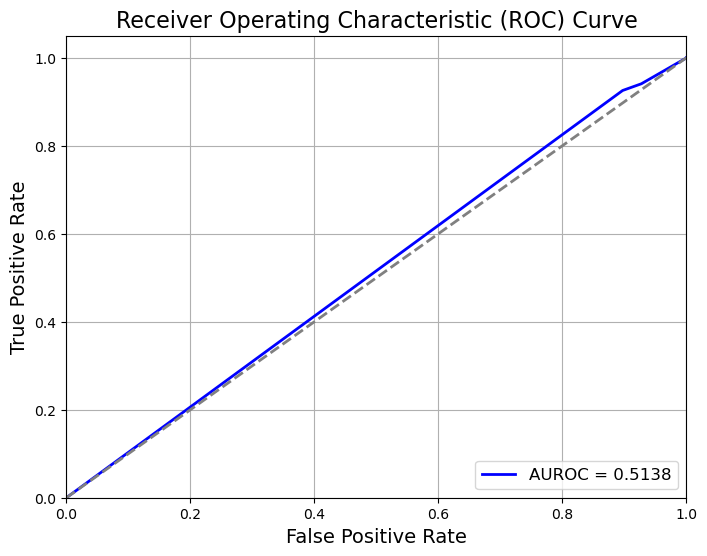

In [39]:
#ROC
plot_auroc(knn_model, X_test, knn_y_pred)

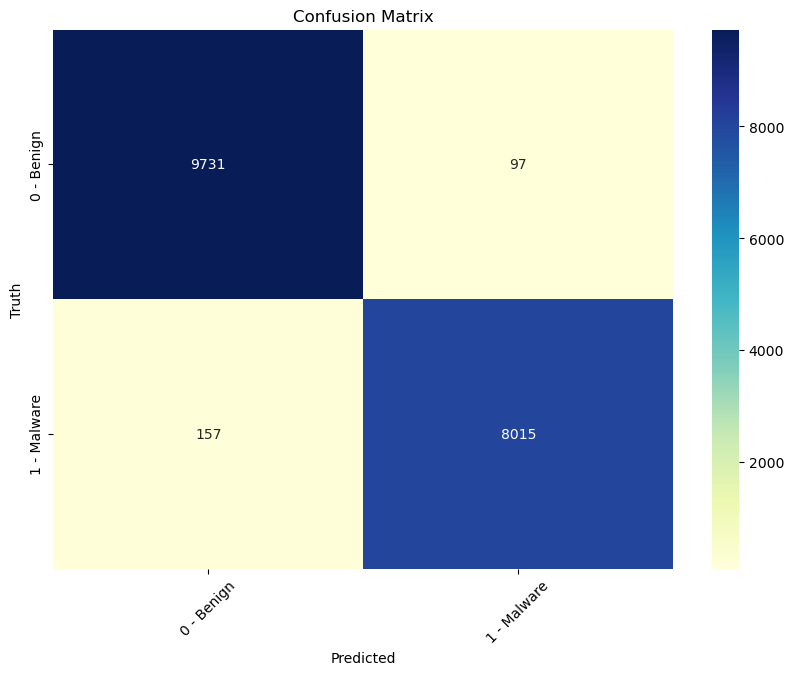

In [40]:
plot_confusion_matrix(y_test, knn_y_pred, label)

### Random Forest Classifier

{'accuracy_score': 1.0, 'precision_score': 1.0, 'recall_score': 1.0, 'f1_score': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9828
           1       1.00      1.00      1.00      8172

    accuracy                           1.00     18000
   macro avg       1.00      1.00      1.00     18000
weighted avg       1.00      1.00      1.00     18000



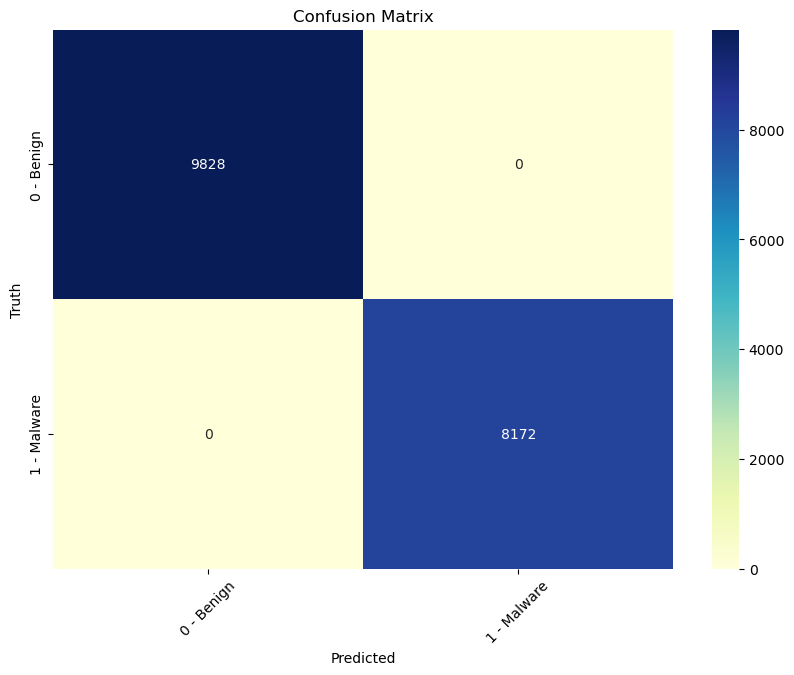

In [41]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=10,
                                             criterion="entropy")
random_forest_model.fit(X_train, y_train)
random_forest_y_pred = random_forest_model.predict(X_test)

print(evaluate_model(y_test, random_forest_y_pred))
print(classification_report(y_test, random_forest_y_pred))
plot_confusion_matrix(y_test, random_forest_y_pred, label)

In [42]:
calculate_rates(y_test, random_forest_y_pred)

'TPR: [0. 1.], FPR: [0. 1.], FNR: [1. 0.], TNR: [1. 0.]'

AUROC: 1.0000


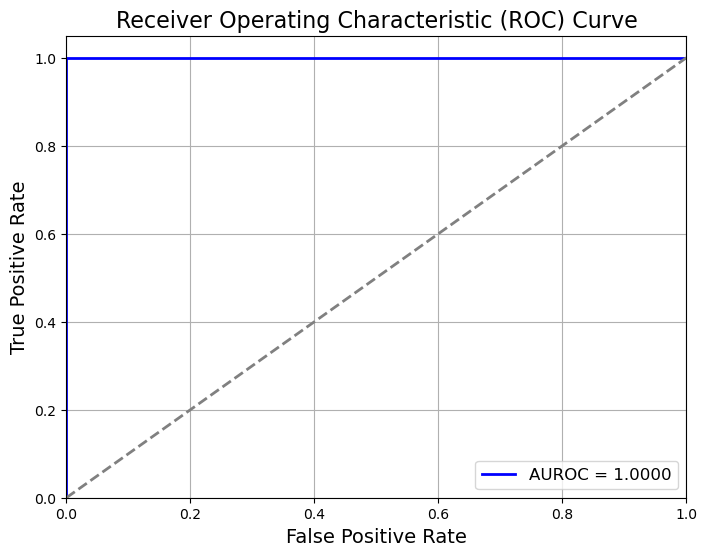

In [43]:
#ROC
plot_auroc(random_forest_model, X_test, random_forest_y_pred)

# Support Vector Classifier

In [216]:
from sklearn.svm import SVC
# SVC Model
svc_model = SVC(kernel='rbf', probability=True)  # probability=True to enable predict_proba
svc_model.fit(scaled_X_train, y_train)
y_pred_svc = svc_model.predict(scaled_X_val)

# Evaluate the model
print("SVC Classification Report:")
print(classification_report(y_test, y_pred_svc))

SVC Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1685
           1       1.00      1.00      1.00      1315

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



{'accuracy_score': 1.0, 'precision_score': 1.0, 'recall_score': 1.0, 'f1_score': 1.0}


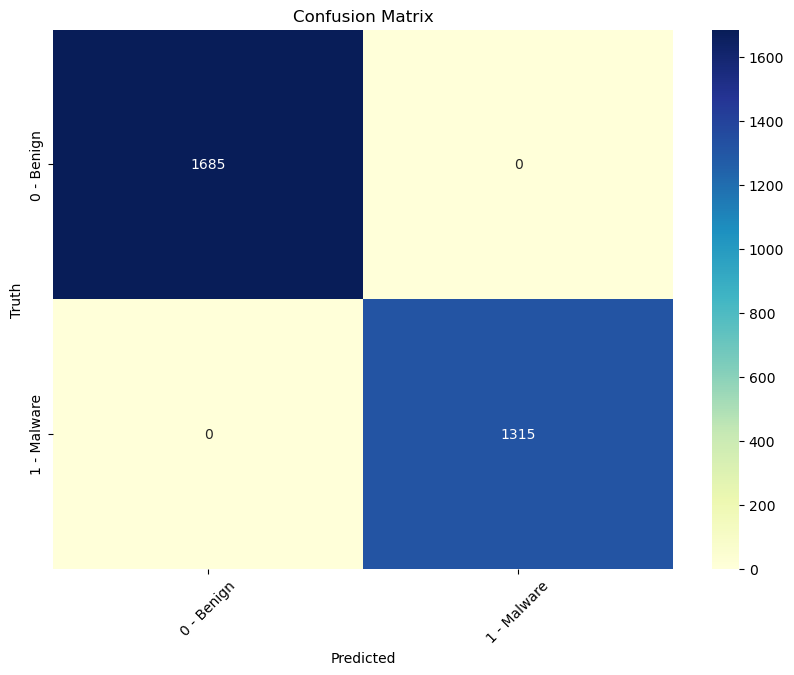

In [217]:
print(evaluate_model(y_test, y_pred_svc))

plot_confusion_matrix(y_test, y_pred_svc, label)

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


AUROC: 0.5000


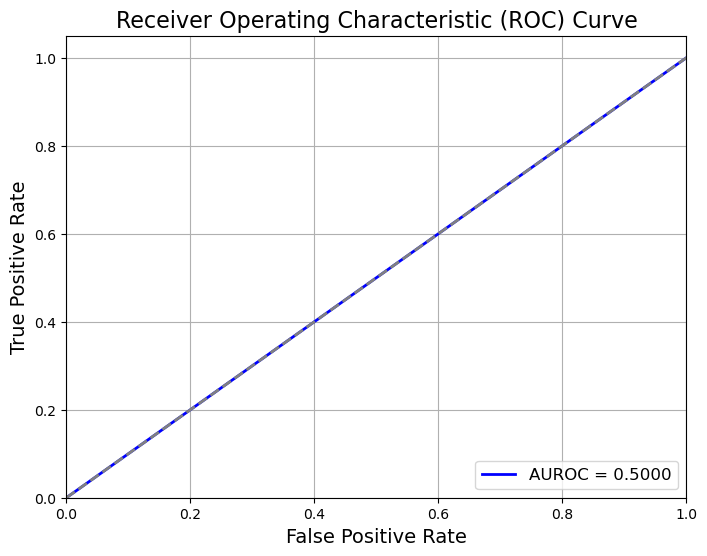

In [186]:
#ROC
plot_auroc(svc_model, X_test, y_pred_svc)

In [187]:
calculate_rates(y_test, y_pred_svc)

'TPR: [0.00902009 0.98059195], FPR: [0.01940805 0.99097991], FNR: [0.99097991 0.01940805], TNR: [0.98059195 0.00902009]'

# Feature Importance Analysis

In [218]:
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier

def plot_permutation_feature_importances(model, X, y):
    # Compute permutation feature importance
    result = permutation_importance(model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
    importances = result.importances_mean

    # Get feature names
    feature_names = X.columns.tolist()

    # Sort indices based on importances
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    for f in range(X.shape[1]):
        print("%d. feature %d (%f) - %s" % (f + 1, indices[f], importances[indices[f]], feature_names[indices[f]]))

    # Plot the feature importances
    plt.figure(figsize=(8, 6))
    plt.title("Permutation Feature Importances")
    plt.bar(range(X.shape[1]), importances[indices],
            color="b", align="center")
    plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.tight_layout()
    plt.show()

**Random Forest Classififer**

Feature ranking:
1. feature 12 (0.306820) - byteperflow
2. feature 11 (0.024085) - pktperflow
3. feature 10 (0.015858) - packetins
4. feature 4 (0.014478) - pktcount
5. feature 5 (0.007382) - bytecount
6. feature 13 (0.006318) - pktrate
7. feature 2 (0.002710) - src
8. feature 0 (0.001242) - dt
9. feature 15 (0.000768) - Protocol
10. feature 3 (0.000045) - dst
11. feature 14 (0.000035) - Pairflow
12. feature 6 (0.000032) - dur
13. feature 1 (0.000017) - switch
14. feature 17 (0.000005) - tx_bytes
15. feature 16 (0.000000) - port_no
16. feature 20 (0.000000) - rx_kbps
17. feature 9 (0.000000) - flows
18. feature 8 (0.000000) - tot_dur
19. feature 7 (0.000000) - dur_nsec
20. feature 18 (0.000000) - rx_bytes
21. feature 19 (0.000000) - tx_kbps
22. feature 21 (0.000000) - tot_kbps


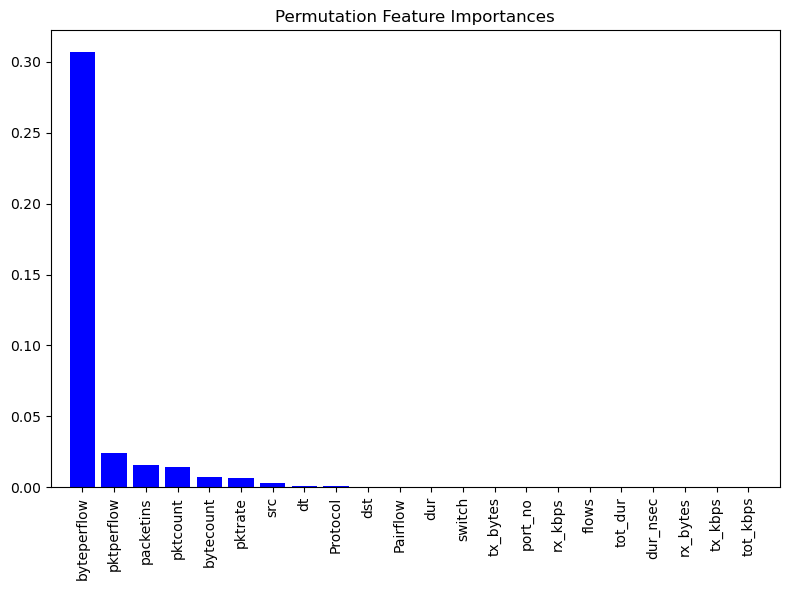

In [49]:
# Plot feature importances for Random Forest classifier
plot_permutation_feature_importances(random_forest_model, X,y)

**KNN model**

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X ha

Feature ranking:
1. feature 12 (0.000185) - byteperflow
2. feature 11 (0.000037) - pktperflow
3. feature 18 (0.000013) - rx_bytes
4. feature 21 (0.000000) - tot_kbps
5. feature 20 (0.000000) - rx_kbps
6. feature 1 (0.000000) - switch
7. feature 2 (0.000000) - src
8. feature 3 (0.000000) - dst
9. feature 4 (0.000000) - pktcount
10. feature 6 (0.000000) - dur
11. feature 9 (0.000000) - flows
12. feature 10 (0.000000) - packetins
13. feature 13 (0.000000) - pktrate
14. feature 14 (0.000000) - Pairflow
15. feature 15 (0.000000) - Protocol
16. feature 16 (0.000000) - port_no
17. feature 17 (0.000000) - tx_bytes
18. feature 19 (0.000000) - tx_kbps
19. feature 0 (0.000000) - dt
20. feature 5 (-0.000023) - bytecount
21. feature 7 (-0.000030) - dur_nsec
22. feature 8 (-0.000272) - tot_dur


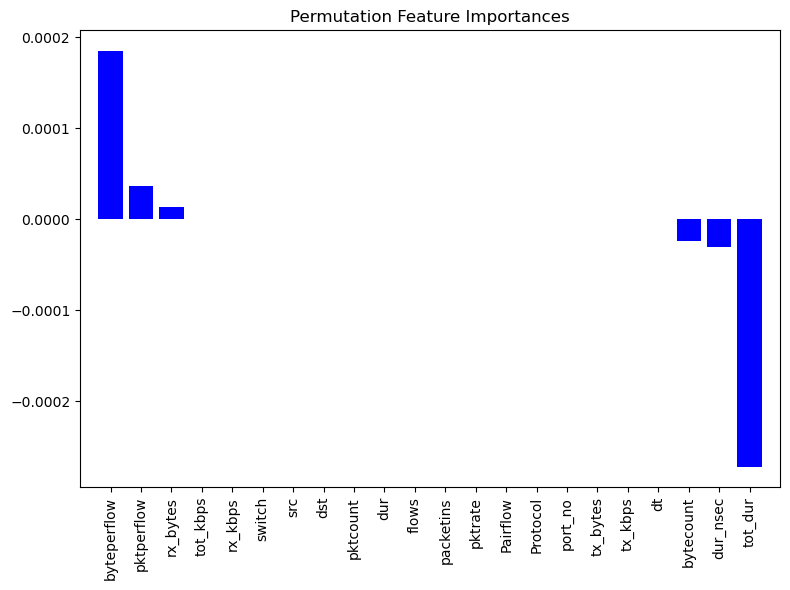

In [66]:
# Plot feature importances for KNN classifier
plot_permutation_feature_importances(knn_model, X,y)

**SVC model**

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/app

Feature ranking:
1. feature 21 (0.000000) - tot_kbps
2. feature 20 (0.000000) - rx_kbps
3. feature 1 (0.000000) - switch
4. feature 2 (0.000000) - src
5. feature 3 (0.000000) - dst
6. feature 4 (0.000000) - pktcount
7. feature 5 (0.000000) - bytecount
8. feature 6 (0.000000) - dur
9. feature 7 (0.000000) - dur_nsec
10. feature 8 (0.000000) - tot_dur
11. feature 9 (0.000000) - flows
12. feature 10 (0.000000) - packetins
13. feature 11 (0.000000) - pktperflow
14. feature 12 (0.000000) - byteperflow
15. feature 13 (0.000000) - pktrate
16. feature 14 (0.000000) - Pairflow
17. feature 15 (0.000000) - Protocol
18. feature 16 (0.000000) - port_no
19. feature 17 (0.000000) - tx_bytes
20. feature 18 (0.000000) - rx_bytes
21. feature 19 (0.000000) - tx_kbps
22. feature 0 (0.000000) - dt


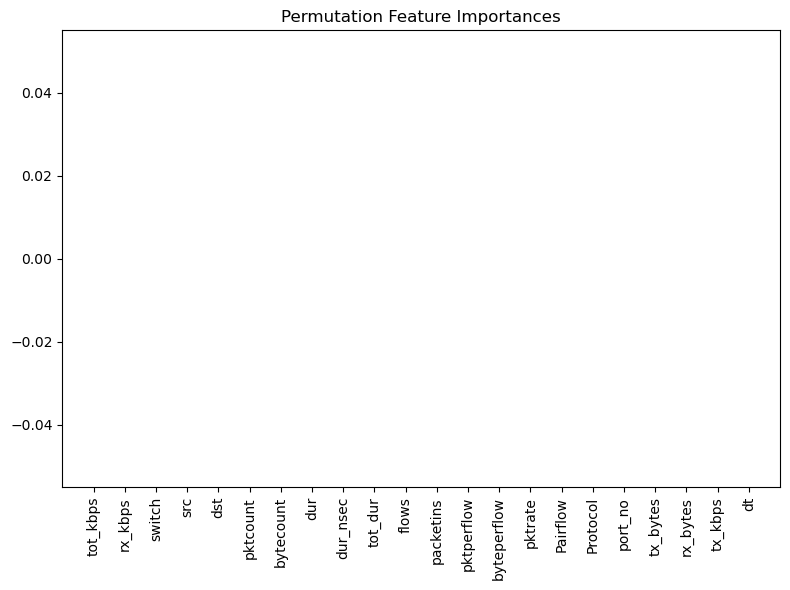

In [220]:
# Plot feature importances for XGBoost classifier
plot_permutation_feature_importances(svc_model, X,y)

In [188]:
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

def plot_permutation_feature_importances(model, X, y):
    # Compute permutation feature importance
    result = permutation_importance(model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
    importances = result.importances_mean

    # Get feature names
    feature_names = X.columns.tolist()

    # Sort indices based on importances
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    for f in range(X.shape[1]):
        print("%d. feature %d (%f) - %s" % (f + 1, indices[f], importances[indices[f]], feature_names[indices[f]]))

    # Plot the feature importances
    plt.figure(figsize=(8, 6))
    plt.title("Permutation Feature Importances")
    plt.bar(range(X.shape[1]), importances[indices],
            color="b", align="center")
    plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.tight_layout()
    plt.show()

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/app

Feature ranking:
1. feature 21 (0.000000) - tot_kbps
2. feature 20 (0.000000) - rx_kbps
3. feature 1 (0.000000) - switch
4. feature 2 (0.000000) - src
5. feature 3 (0.000000) - dst
6. feature 4 (0.000000) - pktcount
7. feature 5 (0.000000) - bytecount
8. feature 6 (0.000000) - dur
9. feature 7 (0.000000) - dur_nsec
10. feature 8 (0.000000) - tot_dur
11. feature 9 (0.000000) - flows
12. feature 10 (0.000000) - packetins
13. feature 11 (0.000000) - pktperflow
14. feature 12 (0.000000) - byteperflow
15. feature 13 (0.000000) - pktrate
16. feature 14 (0.000000) - Pairflow
17. feature 15 (0.000000) - Protocol
18. feature 16 (0.000000) - port_no
19. feature 17 (0.000000) - tx_bytes
20. feature 18 (0.000000) - rx_bytes
21. feature 19 (0.000000) - tx_kbps
22. feature 0 (0.000000) - dt


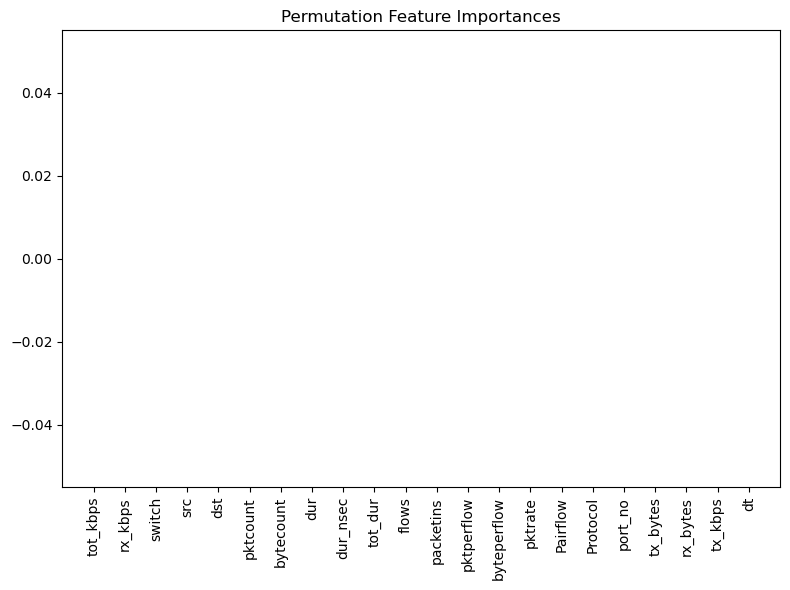

In [190]:
# Plot feature importances
plot_permutation_feature_importances(svc_model, X,y)

# Building the SVC model with 10,000 sample of the dataset due to computational 

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the SVC model
svc = SVC(kernel='rbf', probability=True)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100, 200],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svc, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the model with the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best model
best_svc = grid_search.best_estimator_

# Predict on the validation set
y_pred_svc = best_svc.predict(X_val)



AUROC: 0.9208


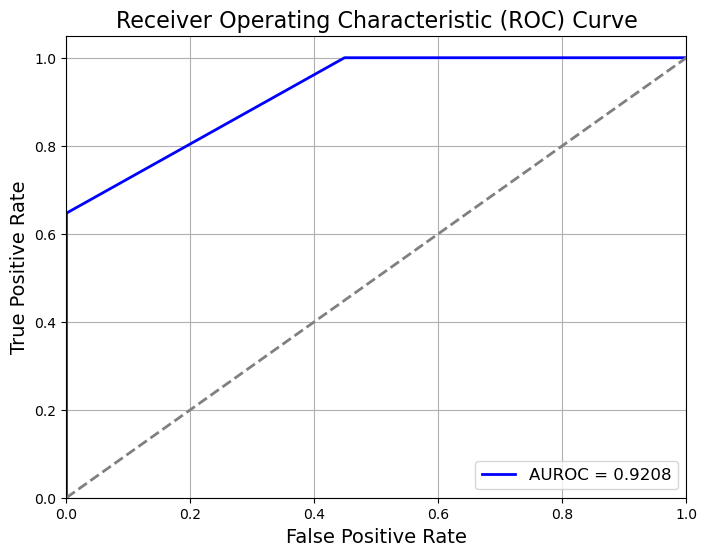

In [234]:
#ROC
plot_auroc(best_svc, X_val, y_val)

Feature ranking:
1. feature 5 (0.140300) - bytecount
2. feature 7 (0.140050) - dur_nsec
3. feature 8 (0.139550) - tot_dur
4. feature 4 (0.139550) - pktcount
5. feature 12 (0.137700) - byteperflow
6. feature 11 (0.132000) - pktperflow
7. feature 0 (0.118950) - dt
8. feature 13 (0.107300) - pktrate
9. feature 17 (0.104850) - tx_bytes
10. feature 18 (0.101350) - rx_bytes
11. feature 6 (0.085050) - dur
12. feature 10 (0.059200) - packetins
13. feature 21 (0.056500) - tot_kbps
14. feature 20 (0.031850) - rx_kbps
15. feature 19 (0.027150) - tx_kbps
16. feature 9 (0.000000) - flows
17. feature 14 (0.000000) - Pairflow
18. feature 15 (0.000000) - Protocol
19. feature 16 (0.000000) - port_no
20. feature 3 (0.000000) - dst
21. feature 2 (0.000000) - src
22. feature 1 (0.000000) - switch


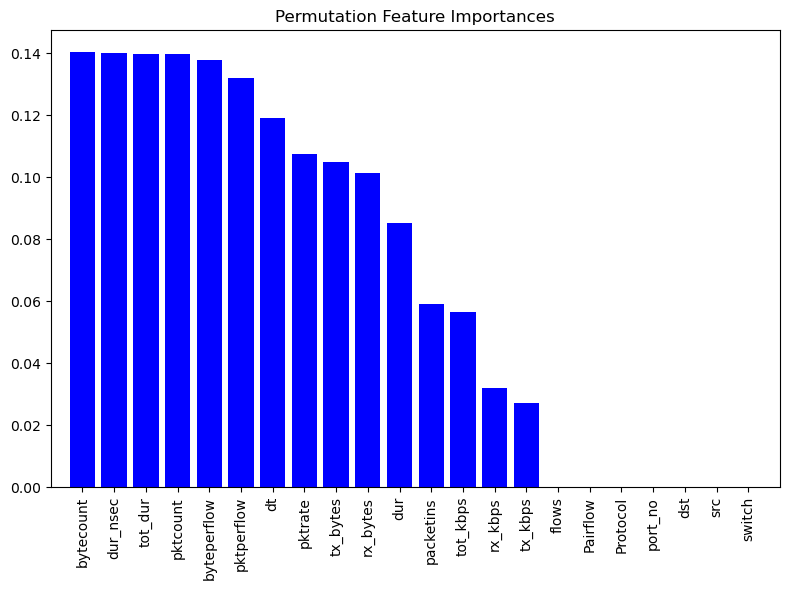

In [235]:
# Plot feature importances
plot_permutation_feature_importances(best_svc,X_val, y_val)

{'accuracy_score': 0.715, 'precision_score': 0.8341094295692666, 'recall_score': 0.6654929577464789, 'f1_score': 0.6492355180422172}


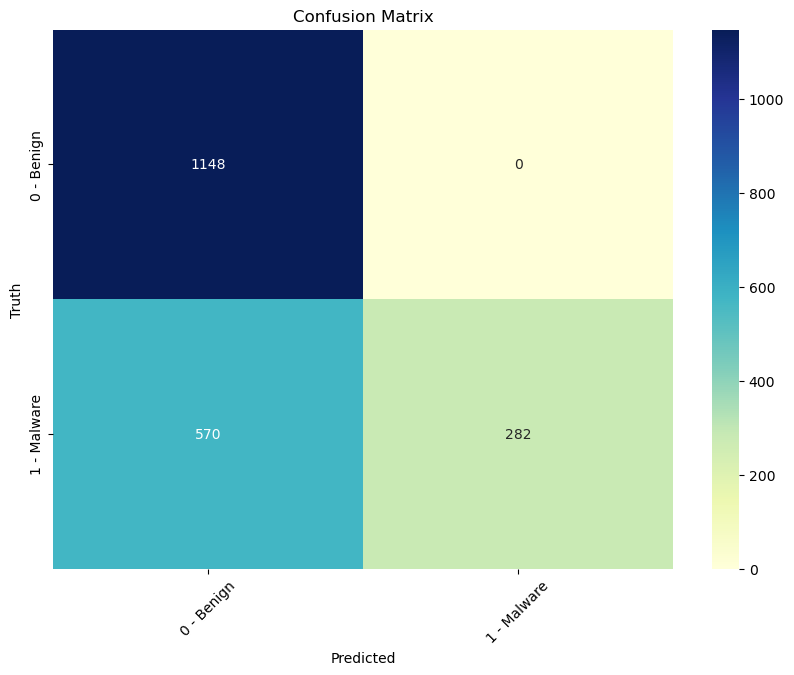

In [254]:
print(evaluate_model(y_val, y_pred_svc))

plot_confusion_matrix(y_val, y_pred_svc, label)

In [35]:
calculate_rates(y_val, y_pred_svc)

'TPR: [0.33178114 1.        ], FPR: [0.         0.66821886], FNR: [0.66821886 0.        ], TNR: [1.         0.33178114]'